In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
# Load dataset
df = pd.read_excel("glass.xlsx", sheet_name="glass")

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [6]:
# Exploratory Data Analysis (EDA)
print("Missing values:")
print(df.isnull().sum())

Missing values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [7]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.0000

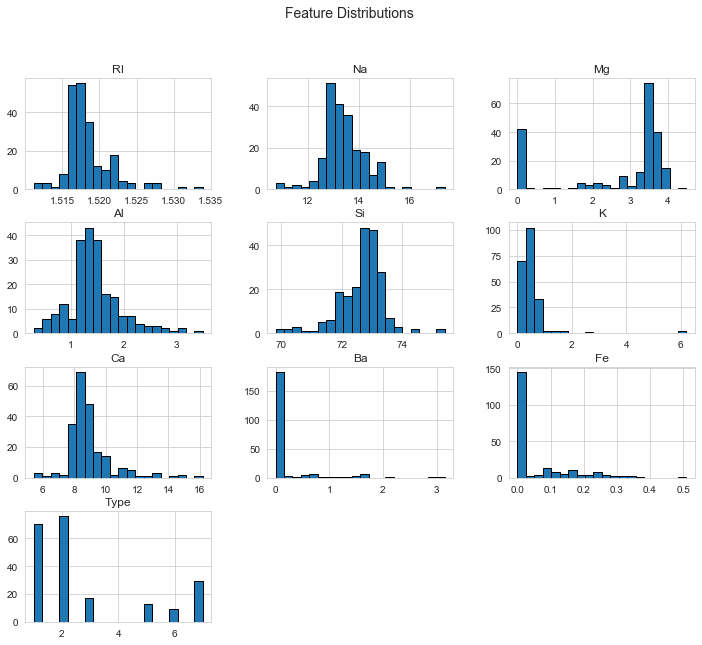

In [8]:
# Data Visualization
sns.set_style("whitegrid")
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

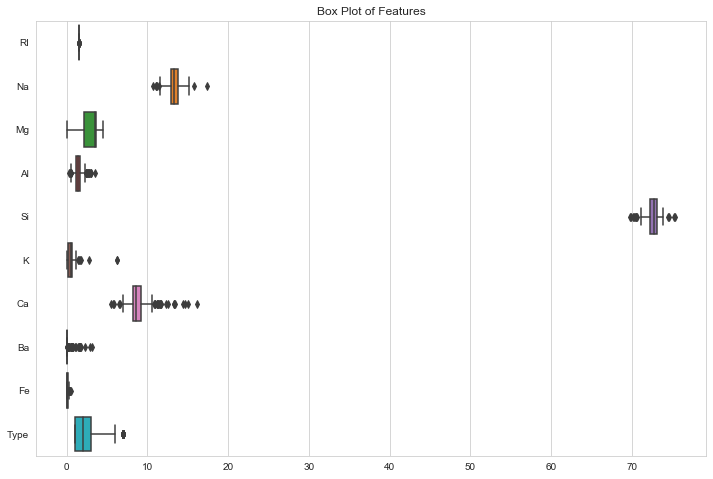

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot of Features")
plt.show()

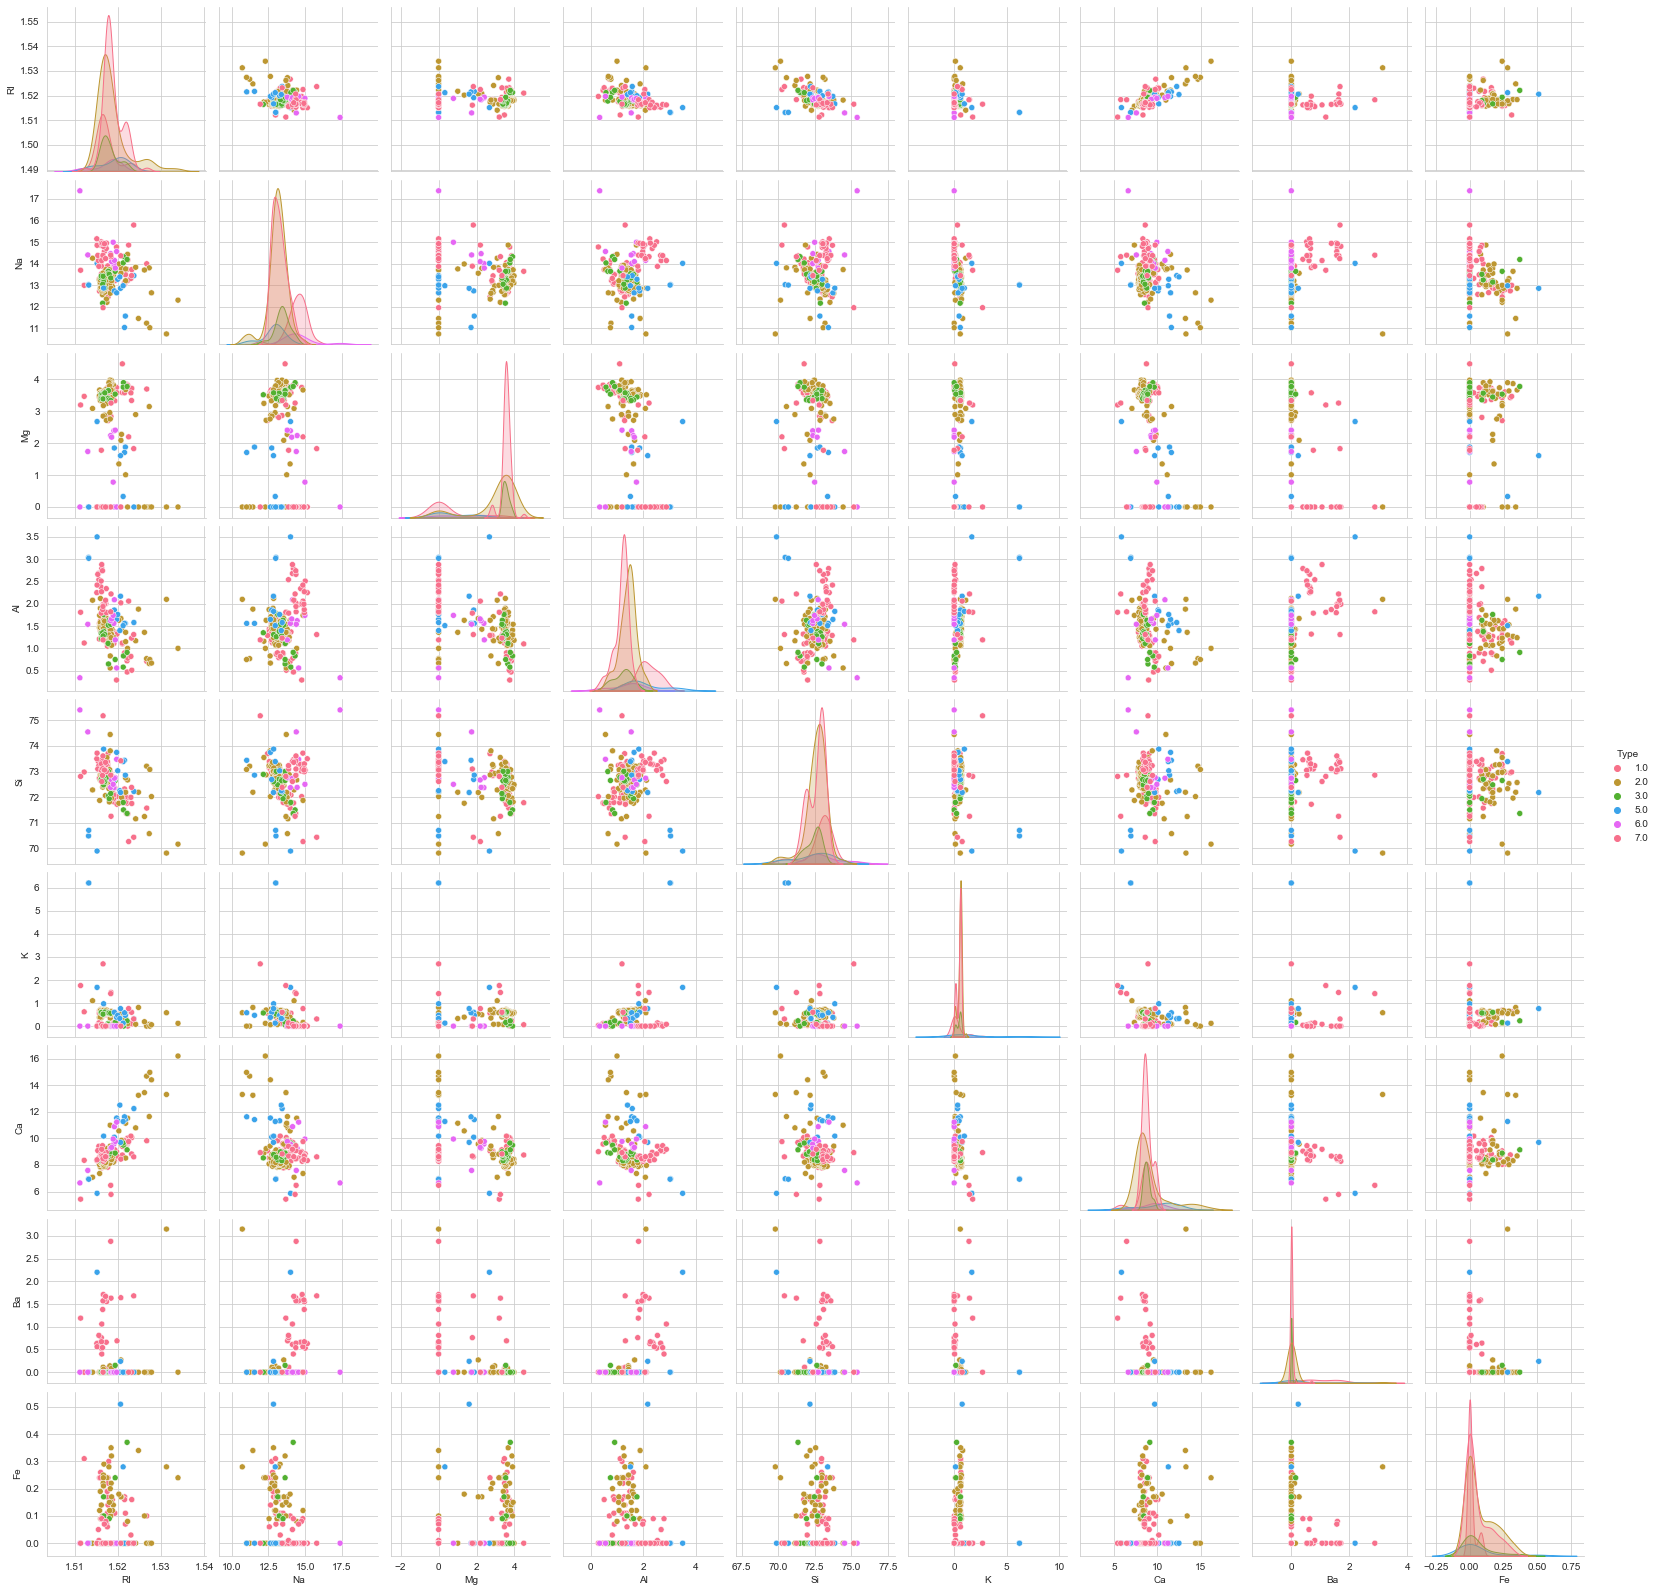

In [10]:
sns.pairplot(df, hue="Type", diag_kind="kde", palette="husl")
plt.show()

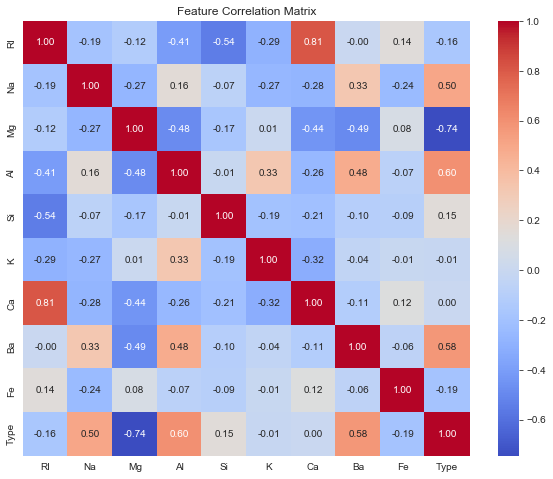

In [19]:
# Correlation Analysis
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Observations:

- Some features show strong correlations with the target variable.
- Certain features have high inter-correlations, indicating redundancy.
- The dataset is imbalanced, affecting model predictions.

In [23]:
# Data Preprocessing
X = df.drop(columns=["Type"])
y = df["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8372093023255814
Precision: 0.8542214739205162
Recall: 0.8372093023255814
F1-score: 0.835526738827564

Classification Report:
               precision    recall  f1-score   support

         1.0       0.76      0.93      0.84        14
         2.0       0.85      0.73      0.79        15
         3.0       1.00      0.67      0.80         3
         5.0       1.00      0.67      0.80         3
         6.0       0.67      1.00      0.80         2
         7.0       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43


Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [25]:
# Bagging Classifier
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)
y_pred_bagging = bagging_model.predict(X_test_scaled)
print("\nBagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Precision:", precision_score(y_test, y_pred_bagging, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_bagging, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_bagging, average='weighted'))


Bagging Accuracy: 0.7906976744186046
Precision: 0.8100775193798448
Recall: 0.7906976744186046
F1-score: 0.7919661733615222


In [26]:
# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_scaled)
print("\nAdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Precision:", precision_score(y_test, y_pred_adaboost, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_adaboost, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_adaboost, average='weighted'))


AdaBoost Accuracy: 0.5348837209302325
Precision: 0.4844961240310077
Recall: 0.5348837209302325
F1-score: 0.4759961920304637


C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gb, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_gb, average='weighted'))


Gradient Boosting Accuracy: 0.8372093023255814
Precision: 0.8490661470312633
Recall: 0.8372093023255814
F1-score: 0.8355003280734714


# 1. Bagging vs. Boosting

Bagging (Bootstrap Aggregating) and Boosting are ensemble learning methods that improve model accuracy by combining multiple weak learners. Bagging works by training multiple independent models on different random subsets of the data (created using bootstrapping) and then averaging their predictions (or majority voting for classification). It reduces variance and helps prevent overfitting. Boosting, on the other hand, trains models sequentially, where each new model focuses on correcting the errors of the previous ones. It assigns higher weights to misclassified instances, making the model improve iteratively. The key difference is that Bagging reduces variance, while Boosting reduces bias and can sometimes lead to overfitting if not carefully tuned.

# 2. Handling Imbalanced Data

When the dataset has significantly more samples of one class than another (imbalance), models may become biased toward the majority class. To handle this, we can use techniques such as oversampling the minority class (e.g., SMOTE – Synthetic Minority Over-sampling Technique), undersampling the majority class, or using balanced class weights in the model to give equal importance to both classes. Another method is using specialized algorithms like Random Forest with balanced sampling or Boosting techniques like Adaptive Boosting and XGBoost, which adjust to misclassified minority class samples. Proper evaluation metrics like F1-score, precision, and recall should be used instead of just accuracy to measure model performance correctly.